<a href="https://colab.research.google.com/github/josevabo/credit_score_streamlit/blob/main/notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Notebook da aula**

https://github.com/alura-cursos/Avaliacao_Credito/tree/main/notebooks

Url dados no github
https://github.com/alura-cursos/Avaliacao_Credito/tree/main/dados

clientes aprovados:
https://raw.githubusercontent.com/alura-cursos/Avaliacao_Credito/main/dados/clientes_aprovados.csv

clientes cadastrados:
https://raw.githubusercontent.com/alura-cursos/Avaliacao_Credito/main/dados/clientes_cadastrados.csv



# Início

In [1]:
import pandas as pd

In [2]:
url_cadastrados = 'https://raw.githubusercontent.com/alura-cursos/Avaliacao_Credito/main/dados/clientes_cadastrados.csv'

In [3]:
df_clientes_cadastrados = pd.read_csv(url_cadastrados,delimiter=',')
df_clientes_cadastrados.head()

,ID_Cliente,Genero,Tem_Carro,Tem_Casa_Propria,Qtd_Filhos,Rendimento_Anual,Categoria_de_renda,Grau_Escolaridade,Estado_Civil,Moradia,Idade,Tem_Celular,Tem_telefone_trabalho,Tem_telefone_fixo,Tem_email,Ocupacao,Tamanho_Familia,Anos_empregado
0,5008804,H,1,1,0,427500.0,Empregado,Ensino superior,Uniao estavel,Alugado,33.0,1,1,0,0,Outros,2.0,12.4
1,5008805,H,1,1,0,427500.0,Empregado,Ensino superior,Uniao estavel,Alugado,33.0,1,1,0,0,Outros,2.0,12.4
2,5008806,H,1,1,0,112500.0,Empregado,Ensino medio,Casado,Casa propria,59.0,1,0,0,0,Seguranca,2.0,3.1
3,5008808,M,0,1,0,270000.0,Associado comercial,Ensino medio,Solteiro,Casa propria,52.0,1,0,1,1,Venda,1.0,8.4
4,5008809,M,0,1,0,270000.0,Associado comercial,Ensino medio,Solteiro,Casa propria,52.0,1,0,1,1,Venda,1.0,8.4


In [4]:
df_clientes_cadastrados.shape

(438557, 18)

In [5]:
df_clientes_cadastrados['ID_Cliente'].value_counts()

7603224    2
7742853    2
7836711    2
7091721    2
7022327    2
          ..
5372264    1
6412652    1
6410605    1
6367602    1
6291456    1
Name: ID_Cliente, Length: 438510, dtype: int64

In [6]:
print(df_clientes_cadastrados.duplicated().head())
df_clientes_cadastrados.duplicated().sum()

0    False
1    False
2    False
3    False
4    False
dtype: bool


0

0 duplicados significa que por mais que alguns Ids se repetem os dados das features não

In [7]:
# Parametro keep=False faz duplicated retornar true para todas ocorrencias de duplicatas, o default retorna apenas para a primeira duplicada de cada ID
print(str(df_clientes_cadastrados['ID_Cliente'].duplicated(keep=False).sum()) + ' IDs duplicados')
df_clientes_cadastrados[df_clientes_cadastrados['ID_Cliente'].duplicated(keep=False)]

94 IDs duplicados


,ID_Cliente,Genero,Tem_Carro,Tem_Casa_Propria,Qtd_Filhos,Rendimento_Anual,Categoria_de_renda,Grau_Escolaridade,Estado_Civil,Moradia,Idade,Tem_Celular,Tem_telefone_trabalho,Tem_telefone_fixo,Tem_email,Ocupacao,Tamanho_Familia,Anos_empregado
421211,7702516,M,0,1,2,180000.0,Empregado,Ensino medio,Casado,Casa propria,32.0,1,1,1,0,Venda,4.0,3.4
421268,7602432,H,0,1,0,315000.0,Associado comercial,Ensino superior,Uniao estavel,Casa propria,46.0,1,0,1,0,Motorista,2.0,3.6
421349,7602432,M,0,0,0,117000.0,Pensionista,Ensino superior,Casado,Casa propria,68.0,1,0,0,0,Outros,2.0,-1000.7
421464,7836971,H,1,0,1,157500.0,Empregado,Ensino medio,Casado,Casa propria,38.0,1,0,0,0,Outros,3.0,15.1
421698,7213374,H,1,0,0,148500.0,Empregado,Ensino medio,Casado,Casa propria,27.0,1,0,1,0,Construcao Civil,2.0,2.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
433158,7282535,M,0,1,0,63000.0,Pensionista,Ensino medio,Casado,Casa propria,58.0,1,0,1,0,Outros,2.0,-1000.7
433159,7742853,H,0,1,0,157500.0,Empregado,Ensino medio,Solteiro,Casa propria,41.0,1,0,0,0,Construcao Civil,1.0,4.6
433217,7135270,M,0,1,0,216000.0,Pensionista,Ensino medio,Casado,Casa propria,63.0,1,0,0,0,Outros,2.0,-1000.7
433666,7091721,M,1,1,0,90000.0,Associado comercial,Ensino medio,Casado,Casa propria,39.0,1,0,0,0,Medicina,2.0,6.2


In [8]:
id_repetidos = df_clientes_cadastrados[df_clientes_cadastrados['ID_Cliente'].duplicated(keep=False)]['ID_Cliente']
id_repetidos

421211    7702516
421268    7602432
421349    7602432
421464    7836971
421698    7213374
           ...   
433158    7282535
433159    7742853
433217    7135270
433666    7091721
433789    7618285
Name: ID_Cliente, Length: 94, dtype: int64

In [9]:
df_clientes_cadastrados_ID_unicos = df_clientes_cadastrados.drop(id_repetidos.index)
df_clientes_cadastrados_ID_unicos.head()

,ID_Cliente,Genero,Tem_Carro,Tem_Casa_Propria,Qtd_Filhos,Rendimento_Anual,Categoria_de_renda,Grau_Escolaridade,Estado_Civil,Moradia,Idade,Tem_Celular,Tem_telefone_trabalho,Tem_telefone_fixo,Tem_email,Ocupacao,Tamanho_Familia,Anos_empregado
0,5008804,H,1,1,0,427500.0,Empregado,Ensino superior,Uniao estavel,Alugado,33.0,1,1,0,0,Outros,2.0,12.4
1,5008805,H,1,1,0,427500.0,Empregado,Ensino superior,Uniao estavel,Alugado,33.0,1,1,0,0,Outros,2.0,12.4
2,5008806,H,1,1,0,112500.0,Empregado,Ensino medio,Casado,Casa propria,59.0,1,0,0,0,Seguranca,2.0,3.1
3,5008808,M,0,1,0,270000.0,Associado comercial,Ensino medio,Solteiro,Casa propria,52.0,1,0,1,1,Venda,1.0,8.4
4,5008809,M,0,1,0,270000.0,Associado comercial,Ensino medio,Solteiro,Casa propria,52.0,1,0,1,1,Venda,1.0,8.4


In [10]:
# Verificando nulos - não há
df_clientes_cadastrados_ID_unicos.isnull().sum()

ID_Cliente               0
Genero                   0
Tem_Carro                0
Tem_Casa_Propria         0
Qtd_Filhos               0
Rendimento_Anual         0
Categoria_de_renda       0
Grau_Escolaridade        0
Estado_Civil             0
Moradia                  0
Idade                    0
Tem_Celular              0
Tem_telefone_trabalho    0
Tem_telefone_fixo        0
Tem_email                0
Ocupacao                 0
Tamanho_Familia          0
Anos_empregado           0
dtype: int64

In [11]:
df_clientes_cadastrados_ID_unicos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 438463 entries, 0 to 438556
Data columns (total 18 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   ID_Cliente             438463 non-null  int64  
 1   Genero                 438463 non-null  object 
 2   Tem_Carro              438463 non-null  int64  
 3   Tem_Casa_Propria       438463 non-null  int64  
 4   Qtd_Filhos             438463 non-null  int64  
 5   Rendimento_Anual       438463 non-null  float64
 6   Categoria_de_renda     438463 non-null  object 
 7   Grau_Escolaridade      438463 non-null  object 
 8   Estado_Civil           438463 non-null  object 
 9   Moradia                438463 non-null  object 
 10  Idade                  438463 non-null  float64
 11  Tem_Celular            438463 non-null  int64  
 12  Tem_telefone_trabalho  438463 non-null  int64  
 13  Tem_telefone_fixo      438463 non-null  int64  
 14  Tem_email              438463 non-nu

## Desafios Aula 1

###Desafio 1 - Explorar IDs repetidos. (Erro? Atualização de cadastro?)
###Desafio 2 - Explorar features/colunas. Identificar categóricas, binárias, discretas, contínuas...

Desafio 1 - Explorar IDs Repetidos

In [12]:
df_clientes_cadastrados.iloc[id_repetidos.index].sort_values('ID_Cliente')

,ID_Cliente,Genero,Tem_Carro,Tem_Casa_Propria,Qtd_Filhos,Rendimento_Anual,Categoria_de_renda,Grau_Escolaridade,Estado_Civil,Moradia,Idade,Tem_Celular,Tem_telefone_trabalho,Tem_telefone_fixo,Tem_email,Ocupacao,Tamanho_Familia,Anos_empregado
426818,7022197,H,1,1,3,135000.0,Empregado,Ensino medio,Casado,Casa propria,33.0,1,0,0,1,Construcao Civil,5.0,2.0
425023,7022197,M,0,1,0,450000.0,Associado comercial,Ensino superior,Separado,Casa propria,54.0,1,0,0,1,Outros,1.0,4.9
431545,7022327,M,0,1,0,135000.0,Associado comercial,Ensino medio,Solteiro,Casa propria,40.0,1,0,0,0,Alta tecnologia,1.0,14.5
431911,7022327,H,1,1,0,256500.0,Associado comercial,Ensino superior,Casado,Casa propria,59.0,1,0,0,1,Equipe principal,2.0,4.6
425486,7023108,H,1,1,1,67500.0,Empregado,Ensino medio,Casado,Casa propria,42.0,1,1,0,0,Equipe principal,3.0,4.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426563,7836711,M,0,1,2,292500.0,Empregado,Ensino superior,Casado,Casa propria,38.0,1,0,1,0,Contabilidade,4.0,12.0
421464,7836971,H,1,0,1,157500.0,Empregado,Ensino medio,Casado,Casa propria,38.0,1,0,0,0,Outros,3.0,15.1
428620,7836971,M,0,1,0,103500.0,Empregado,Ensino medio,Uniao estavel,Casa propria,37.0,1,0,1,0,Venda,2.0,7.7
422068,7838075,H,0,1,0,337500.0,Associado comercial,Ensino medio,Casado,Casa propria,50.0,1,0,0,1,Motorista,2.0,3.5


- Não são a mesma pessoa. ID 7022197 entre outros tem duas ocorrências, cada uma com um sexo diferente

- Aparentemente um erro, tanto pela baixa ocorrência de IDs repetidos, quanto pela maioria dos casos mostrarem que as ocorrências tratam de pessoas diferentes pelo sexo

Desafio 2 - explorar features/colunas

In [13]:
df_clientes_cadastrados_ID_unicos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 438463 entries, 0 to 438556
Data columns (total 18 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   ID_Cliente             438463 non-null  int64  
 1   Genero                 438463 non-null  object 
 2   Tem_Carro              438463 non-null  int64  
 3   Tem_Casa_Propria       438463 non-null  int64  
 4   Qtd_Filhos             438463 non-null  int64  
 5   Rendimento_Anual       438463 non-null  float64
 6   Categoria_de_renda     438463 non-null  object 
 7   Grau_Escolaridade      438463 non-null  object 
 8   Estado_Civil           438463 non-null  object 
 9   Moradia                438463 non-null  object 
 10  Idade                  438463 non-null  float64
 11  Tem_Celular            438463 non-null  int64  
 12  Tem_telefone_trabalho  438463 non-null  int64  
 13  Tem_telefone_fixo      438463 non-null  int64  
 14  Tem_email              438463 non-nu

- 5 quantitativas discretas: Renda, Qtd Filhos, Idade, Tamanho Familia e Anos Empregado
- 6 binarias: Todas que começam com "Tem"
- 6 categóricas: Gênero,Categoria de renda, grau escolaridade, estado civil, moradia, ocupação
- 1 ID

As binárias permitem saber percentual de verdadeiro diretamente na média.

Curiosidades:

- O Tem_celular é irrelevante pois todos nesse DF tem
- Qtd_Filhos tem um registro máximo com 19!

In [14]:
df_clientes_cadastrados_ID_unicos.describe()

,ID_Cliente,Tem_Carro,Tem_Casa_Propria,Qtd_Filhos,Rendimento_Anual,Idade,Tem_Celular,Tem_telefone_trabalho,Tem_telefone_fixo,Tem_email,Tamanho_Familia,Anos_empregado
count,4.384630e+05,438463.000000,438463.000000,438463.000000,4.384630e+05,438463.000000,438463.0,438463.000000,438463.000000,438463.000000,438463.000000,438463.000000
mean,6.021894e+06,0.371906,0.693352,0.427384,1.875220e+05,43.834032,1.0,0.206129,0.287762,0.108196,2.194461,-165.936036
std,5.713554e+05,0.483314,0.461103,0.724879,1.100832e+05,11.472815,0.0,0.404525,0.452720,0.310628,0.897194,380.201131
min,5.008804e+06,0.000000,0.000000,0.000000,2.610000e+04,21.000000,1.0,0.000000,0.000000,0.000000,1.000000,-1000.700000
25%,5.609340e+06,0.000000,0.000000,0.000000,1.215000e+05,34.000000,1.0,0.000000,0.000000,0.000000,2.000000,1.000000
50%,6.047690e+06,0.000000,1.000000,0.000000,1.611000e+05,43.000000,1.0,0.000000,0.000000,0.000000,2.000000,4.000000
75%,6.454118e+06,1.000000,1.000000,1.000000,2.250000e+05,53.000000,1.0,0.000000,1.000000,0.000000,3.000000,8.500000
max,7.999952e+06,1.000000,1.000000,19.000000,6.750000e+06,69.000000,1.0,1.000000,1.000000,1.000000,20.000000,48.000000


# Aula 2 - Analisando a base de cadastro de clientes

In [15]:
colunas_quantitativas = ['Idade', 'Qtd_Filhos', 'Rendimento_Anual', 'Anos_empregado', 'Tamanho_Familia']

In [16]:
df_clientes_cadastrados_ID_unicos[colunas_quantitativas].describe()

,Idade,Qtd_Filhos,Rendimento_Anual,Anos_empregado,Tamanho_Familia
count,438463.000000,438463.000000,4.384630e+05,438463.000000,438463.000000
mean,43.834032,0.427384,1.875220e+05,-165.936036,2.194461
std,11.472815,0.724879,1.100832e+05,380.201131,0.897194
min,21.000000,0.000000,2.610000e+04,-1000.700000,1.000000
25%,34.000000,0.000000,1.215000e+05,1.000000,2.000000
50%,43.000000,0.000000,1.611000e+05,4.000000,2.000000
75%,53.000000,1.000000,2.250000e+05,8.500000,3.000000
max,69.000000,19.000000,6.750000e+06,48.000000,20.000000


A coluna Anos_empregado possui algum outlier em seu mínimo -1000. Devemos removêlo, pois afeta a média

In [17]:
df_clientes_cadastrados_ID_unicos.query('Anos_empregado<0')

,ID_Cliente,Genero,Tem_Carro,Tem_Casa_Propria,Qtd_Filhos,Rendimento_Anual,Categoria_de_renda,Grau_Escolaridade,Estado_Civil,Moradia,Idade,Tem_Celular,Tem_telefone_trabalho,Tem_telefone_fixo,Tem_email,Ocupacao,Tamanho_Familia,Anos_empregado
7,5008812,M,0,1,0,283500.0,Pensionista,Ensino superior,Separado,Casa propria,62.0,1,0,0,0,Outros,1.0,-1000.7
8,5008813,M,0,1,0,283500.0,Pensionista,Ensino superior,Separado,Casa propria,62.0,1,0,0,0,Outros,1.0,-1000.7
9,5008814,M,0,1,0,283500.0,Pensionista,Ensino superior,Separado,Casa propria,62.0,1,0,0,0,Outros,1.0,-1000.7
76,5008884,M,0,1,0,315000.0,Pensionista,Ensino medio,Viuvo,Casa propria,55.0,1,0,0,0,Outros,1.0,-1000.7
160,5008974,M,0,1,0,112500.0,Pensionista,Ensino medio,Casado,Casa propria,61.0,1,0,0,0,Outros,2.0,-1000.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438549,6840098,M,0,1,0,135000.0,Pensionista,Ensino medio,Separado,Casa propria,62.0,1,0,0,0,Outros,1.0,-1000.7
438550,6840100,M,0,1,0,135000.0,Pensionista,Ensino medio,Separado,Casa propria,62.0,1,0,0,0,Outros,1.0,-1000.7
438551,6840102,M,0,1,0,135000.0,Pensionista,Ensino medio,Separado,Casa propria,62.0,1,0,0,0,Outros,1.0,-1000.7
438552,6840104,H,0,1,0,135000.0,Pensionista,Ensino medio,Separado,Casa propria,62.0,1,0,0,0,Outros,1.0,-1000.7


In [18]:
df_clientes_cadastrados_ID_unicos[['Anos_empregado', 'Categoria_de_renda']].value_counts()

Anos_empregado  Categoria_de_renda
-1000.7         Pensionista           75314
 0.6            Empregado              3316
 0.7            Empregado              2855
 0.5            Empregado              2772
 1.1            Empregado              2740
                                      ...  
 12.2           Pensionista               1
 37.1           Servidor publico          1
 3.4            Pensionista               1
 21.4           Pensionista               1
 7.2            Pensionista               1
Length: 1278, dtype: int64

In [19]:
df_clientes_cadastrados_ID_unicos.query('Categoria_de_renda=="Pensionista"')['Anos_empregado'].value_counts()

-1000.7    75314
 3.0           5
 8.6           5
 4.5           5
 1.7           4
           ...  
 4.0           1
 8.3           1
 4.2           1
 4.4           1
 2.5           1
Name: Anos_empregado, Length: 98, dtype: int64

**Existem 75314 ocorrências de -1000.7 anos de emprego para clientes pensionistas. Devemos corrigir**

In [20]:
df_clientes_cadastrados_ID_unicos.query('Anos_empregado <= 0')[['Anos_empregado', 'Categoria_de_renda']].value_counts()

Anos_empregado  Categoria_de_renda 
-1000.7         Pensionista            75314
 0.0            Empregado                 26
                Servidor publico          11
                Associado comercial        7
dtype: int64

**Correção do valor**

Substituir o Anos_empregado dos pensionistas para "-1", pois sua situação é diferente de um desempregado, mas o -1 impacta menos a média que -1000

In [21]:
df_clientes_cadastrados_ID_unicos['Anos_empregado'] = df_clientes_cadastrados_ID_unicos['Anos_empregado'].replace(-1000.7, -1)

In [22]:
df_clientes_cadastrados_ID_unicos.query('Anos_empregado <= 0')[['Anos_empregado', 'Categoria_de_renda']].value_counts()

Anos_empregado  Categoria_de_renda 
-1.0            Pensionista            75314
 0.0            Empregado                 26
                Servidor publico          11
                Associado comercial        7
dtype: int64

### Outliers
---
Abaixo vamos tratar outliers considerando que são todos aqueles fora do nosso intervalo de confiança contido em média +/- 2 x desvio padrao

outliers.....  ||--- 2*std_dev --|média|-- 2*std_dev ---||....... outliers
 

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

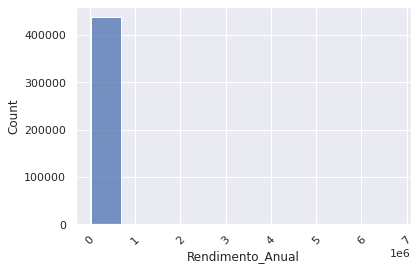

In [24]:
sns.histplot(data = df_clientes_cadastrados_ID_unicos, x='Rendimento_Anual', bins=10)
plt.xticks(rotation=45)
plt.show()

Acima vemos o efeito de um ou alguns outliers estendendo em demasia o eixo x, concentrando a distribuição em uma coluna

####Removendo outliers

In [25]:
coluna = df_clientes_cadastrados_ID_unicos['Rendimento_Anual']

coluna_med = coluna.mean()
coluna_std = coluna.std()

limite_sup = coluna_med + (2 * coluna_std)
limite_inf = coluna_med - (2 * coluna_std)

index_outliers = []

for indice, valor in coluna.items():
  if valor > limite_sup or valor < limite_inf:
    index_outliers.append(indice)

len(index_outliers)

12641

- Dentro do nosso parâmetro de intervalo de confiança, 12641 valores de rendimento anual foram considerados outliers
- Isto representa 2,883 % do dataframe


In [26]:
df_clientes_cadastrados_sem_outliers = df_clientes_cadastrados_ID_unicos.drop(index_outliers)
df_clientes_cadastrados_sem_outliers.shape

(425822, 18)

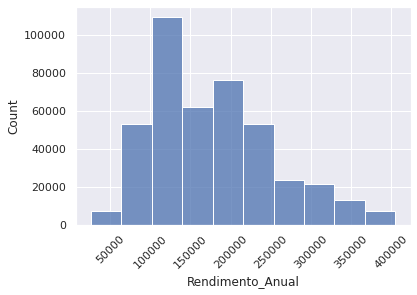

In [27]:
sns.histplot(data = df_clientes_cadastrados_sem_outliers, x='Rendimento_Anual', bins=10)
plt.xticks(rotation=45)
plt.show()

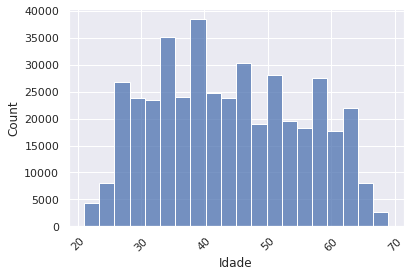

In [28]:
sns.histplot(data = df_clientes_cadastrados_sem_outliers, x='Idade', bins=20)
plt.xticks(rotation=45)
plt.show()

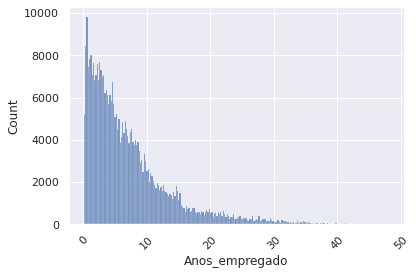

In [29]:
sns.histplot(data = df_clientes_cadastrados_sem_outliers.query("Anos_empregado > 0"), x='Anos_empregado')
plt.xticks(rotation=45)
plt.show()

### Variáveis categóricas

In [30]:
df_clientes_cadastrados_sem_outliers.columns

Index(['ID_Cliente', 'Genero', 'Tem_Carro', 'Tem_Casa_Propria', 'Qtd_Filhos',
       'Rendimento_Anual', 'Categoria_de_renda', 'Grau_Escolaridade',
       'Estado_Civil', 'Moradia', 'Idade', 'Tem_Celular',
       'Tem_telefone_trabalho', 'Tem_telefone_fixo', 'Tem_email', 'Ocupacao',
       'Tamanho_Familia', 'Anos_empregado'],
      dtype='object')

In [31]:
colunas_categoricas = ['Genero', 'Tem_Carro', 'Tem_Casa_Propria',
       'Categoria_de_renda', 'Grau_Escolaridade',
       'Estado_Civil', 'Moradia', 'Tem_Celular',
       'Tem_telefone_trabalho', 'Tem_telefone_fixo', 'Tem_email', 'Ocupacao']

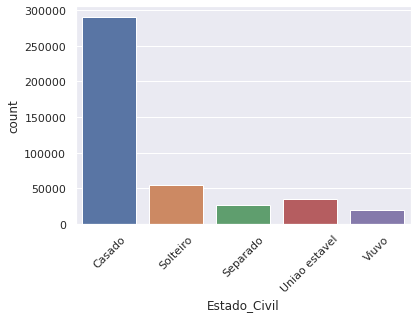

In [32]:
sns.countplot(x='Estado_Civil', data=df_clientes_cadastrados_sem_outliers)
plt.xticks(rotation=45)
plt.show()

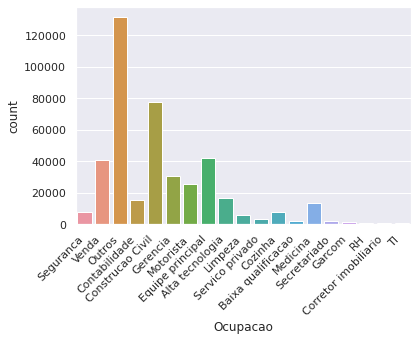

In [33]:
sns.countplot(x='Ocupacao', data=df_clientes_cadastrados_sem_outliers)
plt.xticks(rotation=45, ha='right')
plt.show()

Investigando se o perfil de renda da ocupação outros tem distribuição como as demais ou algo 
mais concentrado (isso identificaria que a ocupação outros pode representar um grupo especifico e não um conjunto de infinits ocupações)

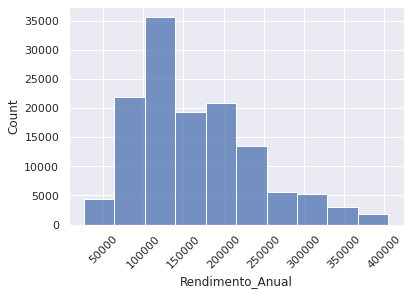

Distribuição de renda para todas ocupações:


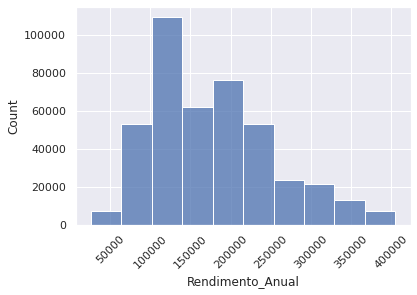

In [34]:
sns.histplot(data = df_clientes_cadastrados_sem_outliers.query("Ocupacao == 'Outros'"), x='Rendimento_Anual', bins=10)
plt.xticks(rotation=45)
plt.show()
print("Distribuição de renda para todas ocupações:")
sns.histplot(data = df_clientes_cadastrados_sem_outliers, x='Rendimento_Anual', bins=10)
plt.xticks(rotation=45)
plt.show()

Acima vemos que a renda na ocupação outros é tão distribuída quanto a renda geral do dataframe

De acordo com BACEN é proibido utilizar features possivelmente discriminatórias em modelo de crédito.

No nosso caso é o Genero. Junto removeremos Tem_celular, pois todos os registros são = 1.0

In [35]:
df_clientes_cadastrados_tratamento1 = df_clientes_cadastrados_sem_outliers.drop(['Genero','Tem_Celular'], axis=1)
df_clientes_cadastrados_tratamento1.shape

(425822, 16)

In [36]:
colunas_categoricas.remove('Genero')
colunas_categoricas.remove('Tem_Celular')
colunas_categoricas

['Tem_Carro',
 'Tem_Casa_Propria',
 'Categoria_de_renda',
 'Grau_Escolaridade',
 'Estado_Civil',
 'Moradia',
 'Tem_telefone_trabalho',
 'Tem_telefone_fixo',
 'Tem_email',
 'Ocupacao']

## Desafios aula 2:

Desafio 1: Aplicar outro método de identificação e tratamento de outliers (Z-score por exemplo)

Desafio 2: Criar função para gerar nossos gráficos

Desafio 3: Continuar a análise exploratória dos dados

### Aplicando z-score

$ z = (x - Xmean)/std $

In [37]:
renda_mean = df_clientes_cadastrados_ID_unicos['Rendimento_Anual'].mean()
renda_std = df_clientes_cadastrados_ID_unicos['Rendimento_Anual'].std()

renda_z_score = (df_clientes_cadastrados_ID_unicos['Rendimento_Anual'] - renda_mean)/renda_std
print(renda_z_score.describe())
print(renda_z_score.shape)

count    4.384630e+05
mean    -2.561611e-15
std      1.000000e+00
min     -1.466364e+00
25%     -5.997467e-01
50%     -2.400186e-01
75%      3.404516e-01
max      5.961383e+01
Name: Rendimento_Anual, dtype: float64
(438463,)


In [38]:
z_max = renda_z_score.mean() + 2* renda_z_score.std()
z_min = renda_z_score.mean() -2* renda_z_score.std()
print('z min: {}, z_max: {}'.format(z_min,z_max))
print(renda_z_score.shape)
renda_z_score = renda_z_score.clip(z_min, z_max)
renda_z_score.shape

z min: -1.999999999999378, z_max: 1.9999999999993727
(438463,)


(438463,)

# Aula 3 - Definindo a classificação de clientes

### Conhecendo a base target

In [39]:
url_aprovados = 'https://raw.githubusercontent.com/alura-cursos/Avaliacao_Credito/main/dados/clientes_aprovados.csv'

In [40]:
df_clientes_aprovados = pd.read_csv(url_aprovados)
df_clientes_aprovados.head()

,ID_Cliente,Mes_referencia,Faixa_atraso
0,5001711,0,nenhum empréstimo
1,5001711,-1,1-29 dias
2,5001711,-2,1-29 dias
3,5001711,-3,1-29 dias
4,5001712,0,pagamento realizado


In [41]:
df_clientes_aprovados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 3 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   ID_Cliente      1048575 non-null  int64 
 1   Mes_referencia  1048575 non-null  int64 
 2   Faixa_atraso    1048575 non-null  object
dtypes: int64(2), object(1)
memory usage: 24.0+ MB


In [42]:
df_clientes_aprovados['ID_Cliente'].value_counts().shape

(45985,)

In [43]:
df_clientes_cadastrados_tratamento1.shape

(425822, 16)

Acima vemos que temos apenas 45k clientes com crédito aprovado no dataframe target comparado com 425k clientes na base de cadastro

In [44]:
df_clientes_aprovados.query('ID_Cliente == 5001712') # ou df_clientes_aprovados[df_clientes_aprovados['ID_Cliente']==5001712]

,ID_Cliente,Mes_referencia,Faixa_atraso
4,5001712,0,pagamento realizado
5,5001712,-1,pagamento realizado
6,5001712,-2,pagamento realizado
7,5001712,-3,pagamento realizado
8,5001712,-4,pagamento realizado
9,5001712,-5,pagamento realizado
10,5001712,-6,pagamento realizado
11,5001712,-7,pagamento realizado
12,5001712,-8,pagamento realizado
13,5001712,-9,1-29 dias


Acima vemos um cliente com histórico de 19 meses de crédito, por isso a base de aprovados tem muito mais registros que clientes

Percebemos também que a coluna faixa_atraso é categórica

In [45]:
df_clientes_aprovados.query('ID_Cliente == 5001711')

,ID_Cliente,Mes_referencia,Faixa_atraso
0,5001711,0,nenhum empréstimo
1,5001711,-1,1-29 dias
2,5001711,-2,1-29 dias
3,5001711,-3,1-29 dias


Em comparação, um outro cliente já tem um histórico menor

In [46]:
#categorias da faixa de atraso
df_clientes_aprovados['Faixa_atraso'].value_counts().index.to_list()

['pagamento realizado',
 '1-29 dias',
 'nenhum empréstimo',
 '30-59 dias',
 '>150 dias',
 '60-89 dias',
 '90-119 dias',
 '120-149 dias']

A faixa de atraso será a coluna para usar para identificar o bom pagador e treinar o modelo

## Criando medidas auxiliares

como é calculado a abertura de crédito ?

1. Criamos uma variavel para guardar os dados da váriavel df_registros_creditos agrupados por ID_Cliente, vamos dar o nome de df_registros_creditos_agrupados_ID, para agrupar usamos o método groupby.

2. Depois vamos utilizar o método apply para iterar por cada ID_Cliente, e vamos utilizar o lambda para criar uma lógica, e essa lógica vai ser aplicada em X, mas o que é X ? X vai ser um DataFrame composto apenas por linhas de um ID por vez, a logíca que vai ser aplicada é calcular, através da função min, o menor valor da coluna Mes_referencia.

3. o retorno dessa função apply vai uma Serie de tamanho igual a quantidade de clientes que temos e vai guardar o menor valor Mes_referencia de cada cliente, vamos salvar isso na váriavel ser_abertura.

In [47]:
df_registros_creditos_agrupados_ID = df_clientes_aprovados.groupby('ID_Cliente')
ser_abertura = df_registros_creditos_agrupados_ID.apply(lambda x: min(x['Mes_referencia']))
ser_abertura.name = 'Abertura'
ser_abertura

ID_Cliente
5001711    -3
5001712   -18
5001713   -21
5001714   -14
5001715   -59
           ..
5150482   -28
5150483   -17
5150484   -12
5150485    -1
5150487   -29
Name: Abertura, Length: 45985, dtype: int64

In [48]:
df_clientes_aprovados = df_clientes_aprovados.merge(ser_abertura, on='ID_Cliente')
df_clientes_aprovados.head()

,ID_Cliente,Mes_referencia,Faixa_atraso,Abertura
0,5001711,0,nenhum empréstimo,-3
1,5001711,-1,1-29 dias,-3
2,5001711,-2,1-29 dias,-3
3,5001711,-3,1-29 dias,-3
4,5001712,0,pagamento realizado,-18


Acima temos uma nova coluna criada que informa qual o mes referencia mais antigo da serie historica deste cliente

como é calculado o ultimo mês do crédito ?

1. Novamente usamos a váriavel df_registros_creditos_agrupados_ID.

2. Depois vamos utilizar o método apply para iterar por cada ID_Cliente, e vamos utilizar o lambda para criar uma lógica, e essa lógica vai ser aplicada em X, mas o que é X ? X vai ser um DataFrame composto apenas por linhas de um ID por vez, a logíca que vai ser aplicada é calcular, através da função max, o maior valor da coluna Mes_referencia.

3. o retorno dessa função apply vai uma Serie de tamanho igual a quantidade de clientes que temos e vai guardar o maior valor Mes_referencia de cada cliente, vamos salvar isso na váriavel ser_final.



In [49]:
ser_final = df_registros_creditos_agrupados_ID.apply(lambda x: max(x['Mes_referencia']))
ser_final.name = 'Final'
ser_final

ID_Cliente
5001711     0
5001712     0
5001713     0
5001714     0
5001715     0
           ..
5150482   -11
5150483     0
5150484     0
5150485     0
5150487     0
Name: Final, Length: 45985, dtype: int64

In [50]:
df_clientes_aprovados = df_clientes_aprovados.merge(ser_final, on='ID_Cliente')
df_clientes_aprovados.head()

,ID_Cliente,Mes_referencia,Faixa_atraso,Abertura,Final
0,5001711,0,nenhum empréstimo,-3,0
1,5001711,-1,1-29 dias,-3,0
2,5001711,-2,1-29 dias,-3,0
3,5001711,-3,1-29 dias,-3,0
4,5001712,0,pagamento realizado,-18,0


In [51]:
df_clientes_aprovados['Janela'] = df_clientes_aprovados['Final'] - df_clientes_aprovados['Abertura']
df_clientes_aprovados.head()

,ID_Cliente,Mes_referencia,Faixa_atraso,Abertura,Final,Janela
0,5001711,0,nenhum empréstimo,-3,0,3
1,5001711,-1,1-29 dias,-3,0,3
2,5001711,-2,1-29 dias,-3,0,3
3,5001711,-3,1-29 dias,-3,0,3
4,5001712,0,pagamento realizado,-18,0,18


In [52]:
# Month On Book é um termo do mercado financeiro que aqui indica há quantos meses o cliente está usufruindo de crédito
df_clientes_aprovados['MOB'] = df_clientes_aprovados['Mes_referencia'] - df_clientes_aprovados['Abertura']
df_clientes_aprovados.head()

,ID_Cliente,Mes_referencia,Faixa_atraso,Abertura,Final,Janela,MOB
0,5001711,0,nenhum empréstimo,-3,0,3,3
1,5001711,-1,1-29 dias,-3,0,3,2
2,5001711,-2,1-29 dias,-3,0,3,1
3,5001711,-3,1-29 dias,-3,0,3,0
4,5001712,0,pagamento realizado,-18,0,18,18


In [53]:
dict_faixa_atraso_ind ={'nenhum empréstimo': 0, 'pagamento realizado': 1,
                        '1-29 dias': 2, '30-59 dias': 3, '60-89 dias': 4,
                        '90-119 dias': 5, '120-149 dias': 6, '>150 dias': 7}

df_clientes_aprovados['Ind_Faixa_atraso'] = df_clientes_aprovados['Faixa_atraso'].map(dict_faixa_atraso_ind)
df_clientes_aprovados.head()

,ID_Cliente,Mes_referencia,Faixa_atraso,Abertura,Final,Janela,MOB,Ind_Faixa_atraso
0,5001711,0,nenhum empréstimo,-3,0,3,3,0
1,5001711,-1,1-29 dias,-3,0,3,2,2
2,5001711,-2,1-29 dias,-3,0,3,1,2
3,5001711,-3,1-29 dias,-3,0,3,0,2
4,5001712,0,pagamento realizado,-18,0,18,18,1


como é definido a coluna Mau para atrasos maiores que 60 dias ?

1. Vamos utilizar o método apply para iterar por cada linha do dataframe df_registros_creditos, e vamos utilizar o lambda para criar uma lógica, e essa lógica vai ser aplicada em X, mas o que é X ? X vai ser um DataFrame composto apenas por uma linha de registro, a logíca que vai ser aplicada é um if que se a coluna Ind_Faixa_atraso tiver o valor maior que 3, indicando que existe um atraso maior que 60 dias ,retorna 1 e 0 caso o contrario.

2. o retorno dessa função apply vai uma Serie e vai guardar 1 representando que aquele cliente foi um mau pagador naquele periodo ou 0 caso o cliente não tenha sido o mau pagador, vamos salvar estes valores em uma nova coluna chamada Mau.

In [54]:
df_clientes_aprovados['Mau'] = df_clientes_aprovados.apply(lambda x: 1 if x['Ind_Faixa_atraso'] > 3 else 0, axis=1)
df_clientes_aprovados.head()

,ID_Cliente,Mes_referencia,Faixa_atraso,Abertura,Final,Janela,MOB,Ind_Faixa_atraso,Mau
0,5001711,0,nenhum empréstimo,-3,0,3,3,0,0
1,5001711,-1,1-29 dias,-3,0,3,2,2,0
2,5001711,-2,1-29 dias,-3,0,3,1,2,0
3,5001711,-3,1-29 dias,-3,0,3,0,2,0
4,5001712,0,pagamento realizado,-18,0,18,18,1,0


## Análise Vintage

como é definido as informações calculadas por ID ?

1. Primeiro vamos utilizar os colchetes para ter apenas as colunas de interesse ID_Cliente ,Abertura , Final, Janela e o que essas colunas tem de especial é que elas tem os mesmo valores para um determinado ID (cliente) idependente do periodo.

2. Depois utilizamos novamente o groupby para unir as linhas com o mesmo ID e utilizamos tambem o apply para aplicar uma logica em cada ID e essa logica vai ser pega o primeiro registro X.iloc[0], lembra que disse que essas colunas tinham o mesmo valor sempre, então podemos pegar qualquer uma, no caso optei pela primeira.

3. Por fim usamos o reset_index para o nosso ID voltar a ser uma coluna e salvamos esse novo DataFrame na váriavel df_registros_creditos_ID

In [55]:
df_registros_creditos_ID = df_clientes_aprovados[['ID_Cliente', 'Abertura', 'Final', 'Janela']].groupby('ID_Cliente').apply(lambda x: x.iloc[0]).reset_index(drop=True)
df_registros_creditos_ID

,ID_Cliente,Abertura,Final,Janela
0,5001711,-3,0,3
1,5001712,-18,0,18
2,5001713,-21,0,21
3,5001714,-14,0,14
4,5001715,-59,0,59
...,...,...,...,...
45980,5150482,-28,-11,17
45981,5150483,-17,0,17
45982,5150484,-12,0,12
45983,5150485,-1,0,1


Como calcular a quantidade clientes por mês de abertura de crédito ?

1. Primeiro utilizamos o groupby no nosso DataFrame, df_registros_creditos_ID, na coluna de Abertura, o que isso faz é unir todos os clientes de acordo com a época que a conta foi aberta.

2. O proximo passo foi usar a método apply que vai iterar por todos valores de abertura de conta e aplicar a nossa função lambda, está por sua vez vai acessa a coluna ID_Cliente e aplicar o método count, na pratica o que vamos ter é a quantidade clientes de clientes que abriram contas naquele determinado valor de abertura.

3. Por fim vamos utilizar o reset_index para recuperarmos a coluna Abertura

In [56]:
df_denominador = df_registros_creditos_ID[['ID_Cliente', 'Abertura']].groupby('Abertura').apply(lambda x: x['ID_Cliente'].count()).reset_index()
df_denominador.columns = ['Abertura', 'Qtd_Clientes']
df_denominador

,Abertura,Qtd_Clientes
0,-60,415
1,-59,406
2,-58,440
3,-57,400
4,-56,470
...,...,...
56,-4,874
57,-3,919
58,-2,771
59,-1,686


Como calcular a quantidade clientes considerando Abertura e MOB ?
1. Mesma logica da operação anterior, mudando apenas que agora que utilizamos o groupby no nosso DataFrame, df_registros_creditos_ID, na coluna de Abertura e na MOB, o que isso faz é unir todos os clientes de acordo com a época que a conta foi aberta e o mês no livro.

In [57]:
df_vintage = df_clientes_aprovados[['ID_Cliente', 'Abertura', 'MOB']].groupby(['Abertura','MOB']).apply(lambda x: x['ID_Cliente'].count()).reset_index()
df_vintage.columns = ['Abertura','MOB','Qtd_Clientes']
df_vintage

,Abertura,MOB,Qtd_Clientes
0,-60,0,415
1,-60,1,414
2,-60,2,410
3,-60,3,408
4,-60,4,403
...,...,...,...
1886,-2,1,770
1887,-2,2,750
1888,-1,0,686
1889,-1,1,682


Agora vamos começar a estrtura da DataFrane Vintage.

1. Vamos utilizar o merge para unir o df_vintage, colunas Abertura e o df_denominador, utilizando a coluna Abertura para unir as informações.

2. Salvamos esse novo DataFrame na váriavel df_vintage

In [58]:
df_vintage = pd.merge(df_vintage[['Abertura','MOB']], df_denominador, on='Abertura', how='left')
df_vintage

,Abertura,MOB,Qtd_Clientes
0,-60,0,415
1,-60,1,415
2,-60,2,415
3,-60,3,415
4,-60,4,415
...,...,...,...
1886,-2,1,771
1887,-2,2,771
1888,-1,0,686
1889,-1,1,686


Calculando a taxa de maus considerando Abertura e MOB

1. Vamos precisar primeiro criar uma coluna nova no DataFrame df_vintage, chamada Qtd_Mau e ela vai armazenar a quantidade de clientes maus em um determinado periodo.

2. Utilizamos o np.nan para preencher essa coluna apenas com valores nulos

3. Agora vamos utilizar um for para iterar por todas os possiveis meses de Abertura, que vão de -60 até 0.

4. Tambem vamos precisa criar uma lista para armazenar os ids que cumprirem os requisitos, classificado como mau e ter MOB igual a i e Abertura igual a j, vamos chamar essa lista de ls.

5. Agora precisamos de segundo for para iterar pelas possibilidades de MOB, que vão de 0 até 60.

6. Vamos utilizar o query para filtrar os apenas os IDs que forem classificados como mau e ter MOB igual a i e Abertura igual a j, transformar em lista com list e salvamos na variavel due.

7. Vamos unir a lista due com a lista ls utilizando o método extend.

8. Utilizando o set vamos garantir o ID apareça apenas uma vez e o len para calcular a quantidade de IDs unicos. Salvamos esse valor na coluna Qtd_Mau na linha de MOB igual a i e Abertura igual a j.

9. Depois de percorrer todas as combinações de MOB e Abertura vamos dividir a quantidade de Ids Mau pela quantidade de Clientes e salvamos esses valores em uma nova coluna chama Taxa_de_Mau.

In [59]:
import numpy as np

In [60]:
df_vintage['Qtd_Mau'] = np.nan

for j in range(-60,1):
    ls = []
    for i in range(0,61):
        due = list(df_clientes_aprovados.query('Mau == 1 and MOB == @i and Abertura == @j')['ID_Cliente'])
        ls.extend(due)
        df_vintage.loc[(df_vintage['MOB'] == i) & (df_vintage['Abertura'] == j), 'Qtd_Mau'] = len(set(ls))
        
df_vintage['Taxa_de_Mau']  = df_vintage['Qtd_Mau'] / df_vintage['Qtd_Clientes']
df_vintage

,Abertura,MOB,Qtd_Clientes,Qtd_Mau,Taxa_de_Mau
0,-60,0,415,0.0,0.000000
1,-60,1,415,0.0,0.000000
2,-60,2,415,0.0,0.000000
3,-60,3,415,0.0,0.000000
4,-60,4,415,0.0,0.000000
...,...,...,...,...,...
1886,-2,1,771,0.0,0.000000
1887,-2,2,771,1.0,0.001297
1888,-1,0,686,0.0,0.000000
1889,-1,1,686,0.0,0.000000


In [61]:
df_vintage_pivot = df_vintage.pivot(index='Abertura',columns='MOB', values='Taxa_de_Mau')
df_vintage_pivot

MOB,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60
Abertura,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
-60,0.0,0.0,0.000000,0.000000,0.000000,0.002410,0.002410,0.007229,0.007229,0.009639,0.009639,0.012048,0.014458,0.016867,0.016867,0.016867,0.016867,0.016867,0.016867,0.016867,0.016867,0.019277,0.019277,0.019277,0.019277,0.021687,0.021687,0.021687,0.021687,0.024096,0.026506,0.026506,0.026506,0.026506,0.026506,0.026506,0.026506,0.026506,0.026506,0.026506,0.026506,0.026506,0.026506,0.026506,0.026506,0.026506,0.026506,0.026506,0.026506,0.026506,0.028916,0.028916,0.028916,0.028916,0.028916,0.028916,0.028916,0.028916,0.031325,0.031325,0.031325
-59,0.0,0.0,0.000000,0.004926,0.004926,0.004926,0.007389,0.007389,0.007389,0.012315,0.012315,0.019704,0.019704,0.019704,0.019704,0.019704,0.019704,0.019704,0.022167,0.024631,0.024631,0.027094,0.027094,0.027094,0.027094,0.029557,0.029557,0.029557,0.029557,0.029557,0.029557,0.029557,0.029557,0.029557,0.029557,0.029557,0.029557,0.029557,0.029557,0.029557,0.029557,0.029557,0.029557,0.029557,0.029557,0.029557,0.029557,0.029557,0.029557,0.029557,0.029557,0.029557,0.029557,0.029557,0.032020,0.032020,0.032020,0.032020,0.032020,0.032020,NaN
-58,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.004545,0.006818,0.006818,0.011364,0.013636,0.013636,0.013636,0.013636,0.013636,0.013636,0.015909,0.018182,0.018182,0.018182,0.022727,0.022727,0.022727,0.022727,0.022727,0.022727,0.022727,0.022727,0.022727,0.022727,0.022727,0.022727,0.022727,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,NaN,NaN
-57,0.0,0.0,0.000000,0.000000,0.002500,0.002500,0.002500,0.007500,0.007500,0.007500,0.007500,0.007500,0.010000,0.017500,0.017500,0.017500,0.017500,0.017500,0.017500,0.017500,0.017500,0.017500,0.017500,0.017500,0.020000,0.020000,0.020000,0.020000,0.020000,0.020000,0.020000,0.020000,0.020000,0.020000,0.020000,0.022500,0.022500,0.022500,0.022500,0.022500,0.022500,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,NaN,NaN,NaN
-56,0.0,0.0,0.004255,0.004255,0.008511,0.010638,0.010638,0.017021,0.017021,0.021277,0.021277,0.025532,0.029787,0.034043,0.034043,0.034043,0.034043,0.034043,0.034043,0.034043,0.034043,0.034043,0.034043,0.034043,0.034043,0.034043,0.034043,0.034043,0.034043,0.034043,0.034043,0.034043,0.034043,0.034043,0.034043,0.034043,0.034043,0.034043,0.034043,0.034043,0.034043,0.034043,0.034043,0.034043,0.034043,0.034043,0.034043,0.034043,0.034043,0.034043,0.034043,0.036170,0.036170,0.036170,0.036170,0.038298,0.038298,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
-4,0.0,0.0,0.000000,0.003432,0.003432,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
-3,0.0,0.0,0.001088,0.001088,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
-2,0.0,0.0,0.001297,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Para construir esse gráfico geramos uma lista valores de 0 até 60.

Essa lista é necessaria para filtrar as colunas e depois utilizar o T (transpose).

Por fim utilizamos o iloc para melhorar a visualização, filtrando apenas algumas datas de aberturas.

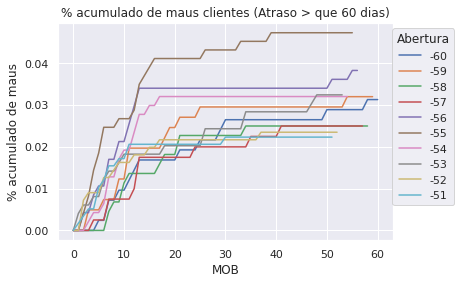

In [62]:
lst = [i for i in range(0,61)]
df_vintage_pivot[lst].T.iloc[:,:10].plot(legend = True, grid = True, title = '% acumulado de maus clientes (Atraso > que 60 dias)')

plt.xlabel('MOB')
plt.ylabel('% acumulado de maus')
plt.legend(bbox_to_anchor=(1.2, 1), title='Abertura')
plt.show()

Conforme apresentado na aula, acima podemos ver que para as diversas janelas de abertura de crédito, o ercentual de maus pagadores cresce nos primeiros meses, mas se estabiliza após 12 meses

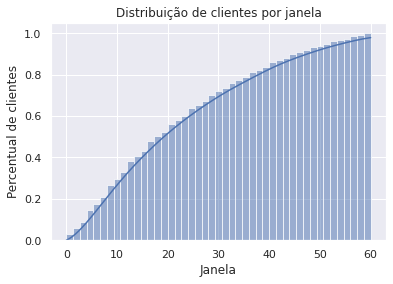

In [63]:
sns.histplot(data=df_registros_creditos_ID, x='Janela', cumulative=True, stat='density', kde=True)
plt.title('Distribuição de clientes por janela')
plt.xlabel('Janela')
plt.ylabel('Percentual de clientes')
plt.show()

Primeiro criamos um dicionario com todas as possiveis faixas de atraso, onde a chave é a descrição da faixa e o valor é o indice da faixa.

Depois utilizamos um for para iterar pelo dicionario, para criar uma coluna para cada uma de nossas faixas.

Para determinar o valor dessas colunas utilizamos o apply, com uma função anônima que vai utilizar a lógica, se o ind da faixa de atraso for maior ou igual que o ind atual classificamos como mau, igual a 1, e caso for menor retornamos 0.

Depois de passar por todas as possibilidades o nosso DataFrame de créditos agora vai ter uma nova coluna de Mau para cada faixa de atraso.

In [64]:
dict_intervalo_atraso = {'maior_30_dias': 3, 'maior_60_dias': 4, 'maior_90_dias': 5,
                        'maior_120_dias': 6, 'maior_150_dias': 7}

In [65]:
for chave, valor in dict_intervalo_atraso.items():
  df_clientes_aprovados[f'Mau_{chave}'] = df_clientes_aprovados.apply(lambda x: 1 if x['Ind_Faixa_atraso'] >= valor else 0, axis=1) # mais de 60
df_clientes_aprovados.head()

,ID_Cliente,Mes_referencia,Faixa_atraso,Abertura,Final,Janela,MOB,Ind_Faixa_atraso,Mau,Mau_maior_30_dias,Mau_maior_60_dias,Mau_maior_90_dias,Mau_maior_120_dias,Mau_maior_150_dias
0,5001711,0,nenhum empréstimo,-3,0,3,3,0,0,0,0,0,0,0
1,5001711,-1,1-29 dias,-3,0,3,2,2,0,0,0,0,0,0
2,5001711,-2,1-29 dias,-3,0,3,1,2,0,0,0,0,0,0
3,5001711,-3,1-29 dias,-3,0,3,0,2,0,0,0,0,0,0
4,5001712,0,pagamento realizado,-18,0,18,18,1,0,0,0,0,0,0


1. Utilizando a mesma logica que utilizamos para calcular a taxa de mau para atrasos de 60 dias, só que agora aplicado a todas as faixas que determinamos.
2. Primeiro criamos um dicionario que vai ser o respoasavel por guardar todas as taxas de mau.
3. Depois armazenamos a quantidade de clientes na variável id_sum
4. Utilizando o for vamos iterar por cada uma das faixas de atraso do dict_intervalo_atraso.
5. Para o nosso calculo primeiro vamos determinar o menor MOB de todos clientes que tiveram classificação mau == 1 e salvar na variavel df_min_mau, para isso utilizamos o query para pegar apenas as linhas que tem a coluna Mau daquele determinada faixa com o valor igual 1. Depois unimos os dados de cada cliente utilizando o groupby, acessamos a coluna MOB e por fim utilizamos min para pegar o menor valor de MOB. (Utilizamos o reset_index para tranformar os IDs novamente em coluna)
6. Tambem vamos precisar de um dataframe, df_mob_taxa_mau, para salvar as taxa de mau por mob, esse DF vai ter uma coluna de MOB variando de 0 até 60 e uma coluna Taxa_Mau apenas com valores nulos.
7. Vamos precisar de uma variavel de apoio lst para armazenar os IDs.
8. Agora vamos utilizar o segundo for que vai iterar por todos os MOB, de 0 até 60.
9. Vamos utilizar a várivel due apenas como auxiliar, nela vamos armazenar temporariamente os IDs que forem daquele MOB. Logo em seguinda vamos incluir essa lista de IDs due na nossa lista principa lst.
10. Agora finalmente vamos armazenar calcular a taxa de mau, divindo a quantidade de Ids unicos na lista lst pela quantidade total de IDs, id_sum, vamos salvar esse valor na coluna Taxa_Mau na linha de MOB igual a i.
11. Depois de calcular todos as taxas, para cada MOB, salvamos a Series, df_mob_taxa_mau['Taxa_Mau'], no dicionario dict_taxa_mau na posição de uma determinada faixa de atraso.
12. Por fim transformamos esse dicionario em um DataFrame df_taxa_mau, onde as linhas vão ser os MOB e as colunas as taxas de mau de cada faixa de atraso.

In [66]:
dict_taxa_mau = {}
id_sum = len(set(df_clientes_aprovados['ID_Cliente']))

for chave in dict_intervalo_atraso.keys():
  df_min_mau = df_clientes_aprovados.query(f'Mau_{chave} == 1').groupby('ID_Cliente')['MOB'].min().reset_index()
  df_mob_taxa_mau = pd.DataFrame({'MOB':range(0,61), 'Taxa_Mau': np.nan})
  lst = []
  for i in range(0,61):
      due = df_min_mau.query('MOB == @i')['ID_Cliente'].to_list()
      lst.extend(due) #cumsum
      df_mob_taxa_mau.loc[df_mob_taxa_mau['MOB'] == i, 'Taxa_Mau'] = len(set(lst)) / id_sum
  dict_taxa_mau[chave] = df_mob_taxa_mau['Taxa_Mau']

df_taxa_mau = pd.DataFrame(dict_taxa_mau)
df_taxa_mau

,maior_30_dias,maior_60_dias,maior_90_dias,maior_120_dias,maior_150_dias
0,0.000304,0.000022,0.000022,0.000022,0.000022
1,0.011612,0.000174,0.000087,0.000087,0.000087
2,0.025878,0.001153,0.000196,0.000174,0.000174
3,0.036860,0.002240,0.000696,0.000304,0.000304
4,0.047385,0.003392,0.001044,0.000696,0.000348
...,...,...,...,...,...
56,0.116321,0.014483,0.007176,0.005263,0.004219
57,0.116321,0.014483,0.007176,0.005263,0.004219
58,0.116321,0.014505,0.007198,0.005284,0.004241
59,0.116321,0.014505,0.007198,0.005284,0.004241


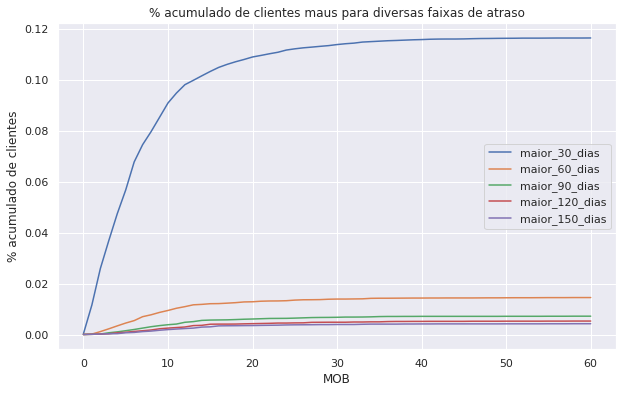

In [67]:
df_taxa_mau.plot(grid = True, title = '% acumulado de clientes maus para diversas faixas de atraso', figsize=(10, 6))
plt.xlabel('MOB')
plt.ylabel('% acumulado de clientes')
plt.show()

## Desafios Aula 3

Desafio 1 - Criar uma tabela com a quantidade clientes relativo a base por faixas atraso

In [68]:
df_clientes_aprovados.head()

,ID_Cliente,Mes_referencia,Faixa_atraso,Abertura,Final,Janela,MOB,Ind_Faixa_atraso,Mau,Mau_maior_30_dias,Mau_maior_60_dias,Mau_maior_90_dias,Mau_maior_120_dias,Mau_maior_150_dias
0,5001711,0,nenhum empréstimo,-3,0,3,3,0,0,0,0,0,0,0
1,5001711,-1,1-29 dias,-3,0,3,2,2,0,0,0,0,0,0
2,5001711,-2,1-29 dias,-3,0,3,1,2,0,0,0,0,0,0
3,5001711,-3,1-29 dias,-3,0,3,0,2,0,0,0,0,0,0
4,5001712,0,pagamento realizado,-18,0,18,18,1,0,0,0,0,0,0


In [69]:
df_clientes_aprovados.columns

Index(['ID_Cliente', 'Mes_referencia', 'Faixa_atraso', 'Abertura', 'Final',
       'Janela', 'MOB', 'Ind_Faixa_atraso', 'Mau', 'Mau_maior_30_dias',
       'Mau_maior_60_dias', 'Mau_maior_90_dias', 'Mau_maior_120_dias',
       'Mau_maior_150_dias'],
      dtype='object')

In [70]:
df_faixas = df_clientes_aprovados.groupby(['Faixa_atraso','ID_Cliente']).count().reset_index()[['Faixa_atraso','ID_Cliente']]

In [71]:
df_faixas.groupby('Faixa_atraso').count()

,ID_Cliente
Faixa_atraso,
1-29 dias,39980
120-149 dias,190
30-59 dias,5201
60-89 dias,597
90-119 dias,268
>150 dias,195
nenhum empréstimo,25005
pagamento realizado,22707


In [72]:
dict_faixa_atraso_ind

{'1-29 dias': 2,
 '120-149 dias': 6,
 '30-59 dias': 3,
 '60-89 dias': 4,
 '90-119 dias': 5,
 '>150 dias': 7,
 'nenhum empréstimo': 0,
 'pagamento realizado': 1}

In [73]:
len(dict_faixa_atraso_ind)

8

In [74]:
[list(dict_faixa_atraso_ind.values()),[0]*len(dict_faixa_atraso_ind)]

[[0, 1, 2, 3, 4, 5, 6, 7], [0, 0, 0, 0, 0, 0, 0, 0]]

In [75]:
df_sum_faixas = pd.DataFrame(index = dict_faixa_atraso_ind.keys(), columns=['Ind_faixa_atraso', 'qtd_clientes'])
df_sum_faixas['Ind_faixa_atraso'] = list(dict_faixa_atraso_ind.values())
df_sum_faixas

,Ind_faixa_atraso,qtd_clientes
nenhum empréstimo,0,NaN
pagamento realizado,1,NaN
1-29 dias,2,NaN
30-59 dias,3,NaN
60-89 dias,4,NaN
90-119 dias,5,NaN
120-149 dias,6,NaN
>150 dias,7,NaN


In [76]:
def maior_atraso(cliente_group):
  ind_faixa_max = cliente_group['Ind_Faixa_atraso'].max()
  return ind_faixa_max

In [77]:
qtd_clientes = df_clientes_aprovados.groupby('ID_Cliente').apply(lambda x: maior_atraso(x)).reset_index().groupby(0).count().reset_index()['ID_Cliente']

In [78]:
df_sum_faixas['qtd_clientes'] = list(qtd_clientes)
df_sum_faixas

,Ind_faixa_atraso,qtd_clientes
nenhum empréstimo,0,4536
pagamento realizado,1,1417
1-29 dias,2,34682
30-59 dias,3,4683
60-89 dias,4,336
90-119 dias,5,88
120-149 dias,6,48
>150 dias,7,195


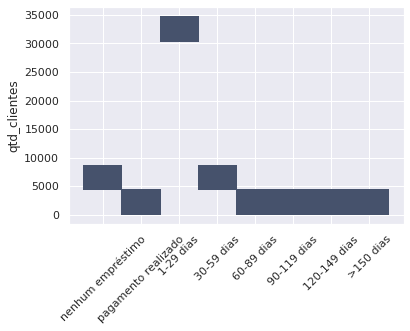

In [79]:
sns.histplot(df_sum_faixas, x=df_sum_faixas.index, y='qtd_clientes')
plt.xticks(rotation=45)
plt.show()

## Definindo o target

In [80]:
# len(df_clientes_aprovados.query('Janela >= 12').groupby('ID_Cliente').count().index)
# len(df_clientes_aprovados.query('Janela >= 12').groupby('ID_Cliente'))
len(df_clientes_aprovados.query('Janela >= 12')['ID_Cliente'].unique())

30918

In [81]:
df_clientes_aprovados_tratamento1 = df_clientes_aprovados.query('Janela >= 12').copy()
df_clientes_aprovados_tratamento1.shape

(943061, 14)

1. Vamos agrupar os clientes por ID e vamos utilizar o método apply para aplicar uma logica para cada ID, essa logica é definida na função verifica.
2. Essa função recebe os registros de cada cliente, salva todas as faixas de atraso na variavel lista_status.
3. Depois utilizamos o if para verificar se as faixas de atraso daquele ID contem alguma das faixas de atrasos determinadas, caso tenha retorna 1 e caso não retorna 0
4. Depois de aplicar em todos os ID, vamos utilizar o reset_index para ter a coluna de ID.
5. No final temos o DataFrame df_registros_creditos_id, com a coluna ID e a coluna Mau.

In [82]:
def verifica(registros):
  lista_status = registros['Faixa_atraso'].to_list()
  if '60-89 dias' in lista_status or '90-119 dias' in lista_status or '120-149 dias' in lista_status or '>150 dias' in lista_status:
    return 1
  else:
    return 0
  
df_registros_creditos_id = pd.DataFrame(df_clientes_aprovados_tratamento1.groupby('ID_Cliente').apply(verifica)).reset_index()
df_registros_creditos_id.columns = ['ID_Cliente', 'Mau']
df_registros_creditos_id.head()

,ID_Cliente,Mau
0,5001712,0
1,5001713,0
2,5001714,0
3,5001715,0
4,5001717,0


In [83]:
df_registros_creditos_id.shape

(30918, 2)

In [84]:
df_clientes_cadastrados_tratamento1.shape

(425822, 16)

In [85]:
df_registro_clientes_targets = df_clientes_cadastrados_tratamento1.merge(df_registros_creditos_id, on='ID_Cliente')
df_registro_clientes_targets.head()

,ID_Cliente,Tem_Carro,Tem_Casa_Propria,Qtd_Filhos,Rendimento_Anual,Categoria_de_renda,Grau_Escolaridade,Estado_Civil,Moradia,Idade,Tem_telefone_trabalho,Tem_telefone_fixo,Tem_email,Ocupacao,Tamanho_Familia,Anos_empregado,Mau
0,5008806,1,1,0,112500.0,Empregado,Ensino medio,Casado,Casa propria,59.0,0,0,0,Seguranca,2.0,3.1,0
1,5008810,0,1,0,270000.0,Associado comercial,Ensino medio,Solteiro,Casa propria,52.0,0,1,1,Venda,1.0,8.4,0
2,5008811,0,1,0,270000.0,Associado comercial,Ensino medio,Solteiro,Casa propria,52.0,0,1,1,Venda,1.0,8.4,0
3,5008812,0,1,0,283500.0,Pensionista,Ensino superior,Separado,Casa propria,62.0,0,0,0,Outros,1.0,-1.0,0
4,5008813,0,1,0,283500.0,Pensionista,Ensino superior,Separado,Casa propria,62.0,0,0,0,Outros,1.0,-1.0,0


In [86]:
df_registro_clientes_targets['Mau'].value_counts(normalize=True)*100

0    97.726673
1     2.273327
Name: Mau, dtype: float64

# Aula 4 - Machine Learning

## Primeiros modelos

In [87]:
colunas_quantitativas = ['Idade', 'Qtd_Filhos', 'Rendimento_Anual', 'Anos_empregado', 'Tamanho_Familia']
colunas_categoricas_binarias = ['Tem_Carro',
                                'Tem_Casa_Propria',
                                'Tem_telefone_trabalho',
                                'Tem_telefone_fixo',
                                'Tem_email']
colunas_categoricas_nao_binarias = ['Categoria_de_renda',
                                    'Grau_Escolaridade',
                                    'Estado_Civil',
                                    'Moradia',
                                    'Ocupacao']



In [88]:
df_registro_clientes_targets = df_registro_clientes_targets[['ID_Cliente'] + colunas_quantitativas + colunas_categoricas_binarias + colunas_categoricas_nao_binarias + ['Mau']]
df_registro_clientes_targets.head()

,ID_Cliente,Idade,Qtd_Filhos,Rendimento_Anual,Anos_empregado,Tamanho_Familia,Tem_Carro,Tem_Casa_Propria,Tem_telefone_trabalho,Tem_telefone_fixo,Tem_email,Categoria_de_renda,Grau_Escolaridade,Estado_Civil,Moradia,Ocupacao,Mau
0,5008806,59.0,0,112500.0,3.1,2.0,1,1,0,0,0,Empregado,Ensino medio,Casado,Casa propria,Seguranca,0
1,5008810,52.0,0,270000.0,8.4,1.0,0,1,0,1,1,Associado comercial,Ensino medio,Solteiro,Casa propria,Venda,0
2,5008811,52.0,0,270000.0,8.4,1.0,0,1,0,1,1,Associado comercial,Ensino medio,Solteiro,Casa propria,Venda,0
3,5008812,62.0,0,283500.0,-1.0,1.0,0,1,0,0,0,Pensionista,Ensino superior,Separado,Casa propria,Outros,0
4,5008813,62.0,0,283500.0,-1.0,1.0,0,1,0,0,0,Pensionista,Ensino superior,Separado,Casa propria,Outros,0


In [89]:
!pip install scikit-learn==0.23.2 imbalanced-learn==0.7.0

     |████████████████████████████████| 6.8 MB 5.8 MB/s 
     |████████████████████████████████| 167 kB 77.1 MB/s 
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.0.2
    Uninstalling scikit-learn-1.0.2:
      Successfully uninstalled scikit-learn-1.0.2
  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.8.1
    Uninstalling imbalanced-learn-0.8.1:
      Successfully uninstalled imbalanced-learn-0.8.1


In [90]:
import six
import sys
sys.modules['sklearn.externals.six'] = six

In [91]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, classification_report, plot_confusion_matrix

from scipy import stats

### Uso do kstest - métrica comum em credit score
---
Em estatística, o teste Kolmogorov–Smirnov (também conhecido como teste KS ou teste K–S) é um teste não paramétrico de bondade do ajuste sobre a igualdade de distribuições de probabilidade contínuas e unidimensionais que pode ser usado para comparar uma amostra com uma distribuição de probabilidade de referência (teste K–S uniamostral) ou duas amostras uma com a outra (teste K–S biamostral). Recebe este nome em homenagem aos matemáticos russos Andrei Kolmogorov e Nikolai Smirnov.

O teste K–S biamostral é um dos métodos não paramétricos mais úteis e difundidos para a comparação de duas amostras, já que é sensível a diferenças tanto no local, como na forma das funções distribuição acumulada empírica das duas amostras.

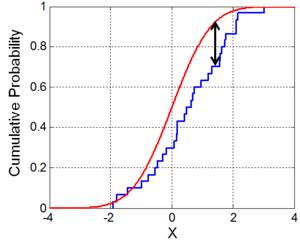

###Para saber mais: Teste KS

Como já tínhamos acompanhado nos módulos anteriores, após fazermos o ajuste de um algoritmo, usamos uma combinação de técnicas para validar o modelo produzido. Existem métricas que podem medir a acurácia, a precisão e até mesmo a diferenciação entre as classes de um modelo binário (AUC, por exemplo).

Dentre as métricas que usamos para medir e validar a nossa curva ajustada em relação ao conjunto de dados, neste módulo extra, utilizamos uma diferente: o teste KS (abreviação para “Teste Kolmogorov-Smirnov”).

Como desenvolvemos um modelo para classificação supervisionada (nosso target determinou quem era um bom ou um mau pagador), podemos usar este teste estatístico não paramétrico para mensurar quão bem o ajuste se saiu.

O KS pode ser usado tanto para comparar uma amostra com uma distribuição de probabilidade de referência, o chamado Teste KS de amostra única, quantificando a distância entre a função de distribuição empírica da amostra e a função de distribuição cumulativa da distribuição de referência (em sua maioria, quando falamos dessa distribuição de referência, estamos falando da distribuição normal), quanto também pode comparar duas amostras entre si, o teste KS biamostral, que é nosso caso.

No gráfico abaixo as linhas azul e vermelha representam duas funções de distribuição e a seta preta representa a estatística KS biamostral.

Gráfico em eixos cartesianos onde o eixo x representa números discretos variando de [-4 , 4] e no eixo y encontramos a probabilidade acumulada variando de [0 ,1]. No centro do plano, temos a representação de duas linhas crescentes e que não se coincidem, nas cores azul e vermelha. No maior espaçamento entre essas linhas, temos uma seta preta vertical que é a representação gráfica do KS biamostral

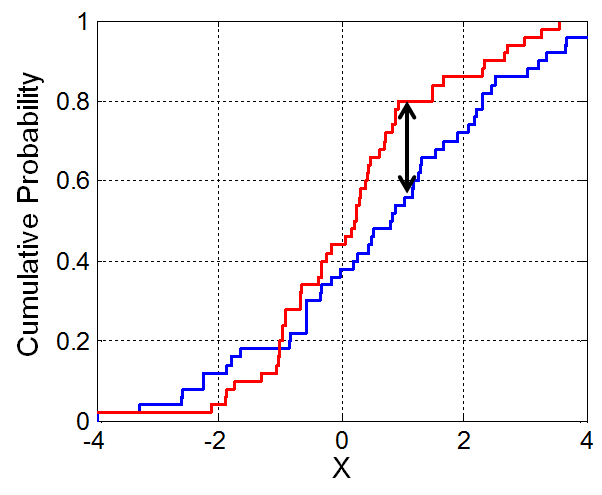

O caso biamostral indica o cálculo da performance do modelo, ou seja, se a separação da variável resposta (no nosso caso, estamos classificando bons e maus pagadores) está coerente com o que esperávamos na fase de desenvolvimento.

Temos dois principais objetivos:

Verificar o quanto o modelo consegue discriminar os maus proponentes dos bons.
Neste caso, quanto maior for o KS, melhor. Ou seja, podemos dizer que o modelo está conseguindo atribuir valores suficientemente diferentes entre os bons e maus pagadores. Segundo a literatura: “O teste de Kolmogorov-Smirnov (KS) é utilizado no mercado financeiro como um dos indicadores de eficiência de modelos de credit scoring, sendo que o mercado considera um bom modelo aquele que apresente um valor de KS igual ou superior a 30”(1).
Desta forma, podemos concluir que essa métrica será capaz de avaliar a discriminação final do modelo.

Literatura citada: PICININI, R., OLIVEIRA, G. M. B.; MONTEIRO, L. H. A. Mineração de critério de credit scoring utilizando algoritmos genéticos. In: SIMPÓSIO BRASILEIRO DE AUTOMAÇÃO INTELIGENTE, 6, 2003, Bauru. Anais... Bauru: Universidade de Brasília, 2003 (disponível em: https://proxy.furb.br/ojs/index.php/universocontabil/article/view/2374/1946)

(1) A citação está em percentual. Quando ele fala 30 está querendo dizer 0,3

In [92]:
SEED = 1561651
def roda_modelo(modelo, dados):

    # separando dados em x e y, e tambem removendo a coluna de ID_cliente
    x = dados.drop(['ID_Cliente', 'Mau'], axis=1)
    y = dados.drop('ID_Cliente', axis=1)['Mau']
    
    # Separando dados em treino e teste
    x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y, random_state=SEED)

    # Treinando modelo com os dados de treino
    modelo.fit(x_train, y_train)

    # Calculando a probabilidade e calculando o AUC
    prob_predic = modelo.predict_proba(x_test)
    auc = roc_auc_score(y_test, prob_predic[:,1])
    print(f"AUC {auc}")
    
    # Separando a probabilidade de ser bom e mau, e calculando o KS
    data_bom = np.sort(modelo.predict_proba(x_test)[:, 1])
    data_mau = np.sort(modelo.predict_proba(x_test)[:, 0])
    kstest = stats.ks_2samp(data_bom, data_mau)
    print(f"KS {kstest}")

    # Criando matriz de confusão
    matriz_confusao = plot_confusion_matrix(modelo, x_test, y_test, values_format='.0f', display_labels=['Bons', 'Maus'])
    plt.grid(False)    
    plt.show(matriz_confusao)

    # Fazendo a predicao dos dados de teste e calculando o classification report
    predicao = modelo.predict(x_test)
    print("\nClassification Report")
    print(classification_report(y_test, predicao, zero_division=0))

### Uso de OneHotEncoder e MinMaxScaler para pre-processamento dos dados

In [93]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.base import BaseEstimator, TransformerMixin

In [94]:
# PEP8 padrão CamelCase
class Transformador(BaseEstimator, TransformerMixin):
    def __init__( self, colunas_quantitativas, colunas_categoricas):
        self.colunas_quantitativas = colunas_quantitativas
        self.colunas_categoricas = colunas_categoricas
        self.enc = OneHotEncoder()
        self.scaler = MinMaxScaler()

    def fit(self, X, y = None ):
        self.enc.fit(X[self.colunas_categoricas])
        self.scaler.fit(X[self.colunas_quantitativas])
        return self 

    def transform(self, X, y = None):
      
      X_categoricas = pd.DataFrame(data=self.enc.transform(X[self.colunas_categoricas]).toarray(),
                                  columns= self.enc.get_feature_names(self.colunas_categoricas))
      
      X_continuas = pd.DataFrame(data=self.scaler.transform(X[self.colunas_quantitativas]),
                                  columns= self.colunas_quantitativas)
      
      X = pd.concat([X_continuas, X_categoricas], axis=1)

      return X

### Pipeline, desbalanceamento e primeiro modelo DummyClassifier
---
Como a base de treino é bem desbalanceada (98% bons pagadores), o Dummy Classifier adota a estratégia de apontar todos como bons pagadores. 

**Na métrica de precisão o modelo fica com 98%**

**Por isso importante usar outras métricas, como o kstest, pois 98% de precisao é bom, mas um modelo que aprova todos os clientes é inútil**

In [95]:
from sklearn.pipeline import Pipeline

AUC 0.5
KS Ks_2sampResult(statistic=1.0, pvalue=0.0)


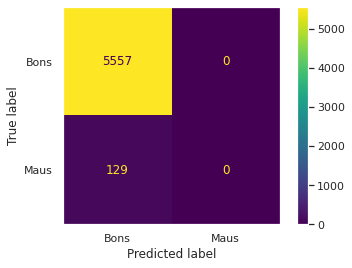


Classification Report
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      5557
           1       0.00      0.00      0.00       129

    accuracy                           0.98      5686
   macro avg       0.49      0.50      0.49      5686
weighted avg       0.96      0.98      0.97      5686



In [96]:
pipeline = Pipeline([('Transformador', Transformador(colunas_quantitativas, colunas_categoricas)),
                     ('Modelo', DummyClassifier(strategy='prior'))])   
roda_modelo(pipeline, df_registro_clientes_targets)

### Modelo LogisticRegression e desbalanceamento
---
O modelo LogisticRegression é mais complexo que o DummyClassifier, mas mesmo assim chuta tudo positivo, pois a base está muito desbalanceada

AUC 0.5847293657137516
KS Ks_2sampResult(statistic=1.0, pvalue=0.0)


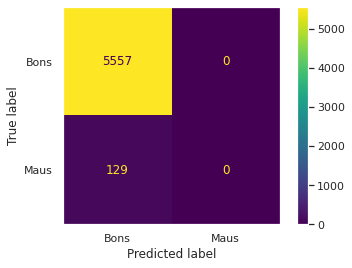


Classification Report
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      5557
           1       0.00      0.00      0.00       129

    accuracy                           0.98      5686
   macro avg       0.49      0.50      0.49      5686
weighted avg       0.96      0.98      0.97      5686



In [97]:
pipeline = Pipeline([('Transformador', Transformador(colunas_quantitativas, colunas_categoricas)),
                     ('Modelo', LogisticRegression(random_state=SEED, max_iter=1000))])   
roda_modelo(pipeline, df_registro_clientes_targets)

## Tratando o desbalanceamento dos dados

### Oversampling(SMOTE) e UnderSampling 
---
Como nossa base de dados é desbalanceada, utilizaremos o SMOTE (Synthetic Minority Oversampling Technique), uma técnica de OverSampling.

Ela aumentará sinteticamente (duplicará dados) a quantidade de registros com a classificação minotitária. NO nosso caso os registros de mau pagador que só representa 2% da base (50x menor que a base de registros de bom pagador)

In [98]:
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline

AUC 0.5815864619385006
KS Ks_2sampResult(statistic=0.1290889905029898, pvalue=1.09559025330554e-41)


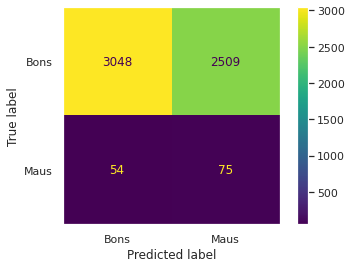


Classification Report
              precision    recall  f1-score   support

           0       0.98      0.55      0.70      5557
           1       0.03      0.58      0.06       129

    accuracy                           0.55      5686
   macro avg       0.51      0.56      0.38      5686
weighted avg       0.96      0.55      0.69      5686



In [99]:
pipeline = Pipeline([('Transformador', Transformador(colunas_quantitativas, colunas_categoricas)),
                     ('sampling', SMOTE(random_state=SEED)),
                     ('Modelo', LogisticRegression(random_state=SEED, max_iter=1000))])   
roda_modelo(pipeline, df_registro_clientes_targets)

### Usando RandomForestClassifier (Com e sem SMOTE[Oversampling])
---
O LogisticRegression anteriormente teve uma precisão baixa, pois apontou muitos maus pagadores. Isso era melhor que apontar todos como bons pagadores, trazendo crédito sujo. Mas negar crédito demais também não é bom.

Abaixo usamos o RandomForestClassifier, um modelo mais elaborado que o LogisticRegression. E vemos que o RandomForest capta muito melhor as variações dos dados que são relevantes para sua classificação, trazendo resultados bem melhores, com ou sem o oversampling rebalanceando a base de treino.

In [100]:
from sklearn.ensemble import RandomForestClassifier

AUC 0.8340043216670643
KS Ks_2sampResult(statistic=0.9653534998241294, pvalue=0.0)


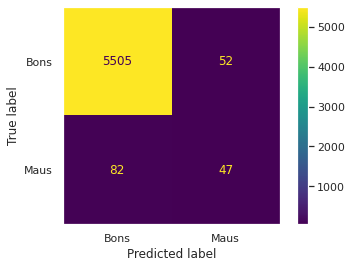


Classification Report
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5557
           1       0.47      0.36      0.41       129

    accuracy                           0.98      5686
   macro avg       0.73      0.68      0.70      5686
weighted avg       0.97      0.98      0.97      5686



In [101]:
pipeline = Pipeline([('Transformador', Transformador(colunas_quantitativas, colunas_categoricas)),
                     ('sampling', SMOTE(random_state=SEED)),
                     ('Modelo', RandomForestClassifier(random_state=SEED))])   
roda_modelo(pipeline, df_registro_clientes_targets)

AUC 0.8382939040500634
KS Ks_2sampResult(statistic=0.9794231445655998, pvalue=0.0)


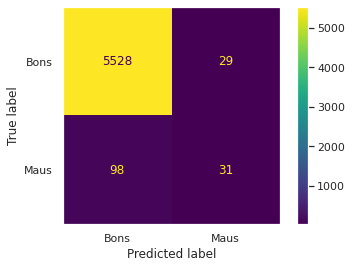


Classification Report
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      5557
           1       0.52      0.24      0.33       129

    accuracy                           0.98      5686
   macro avg       0.75      0.62      0.66      5686
weighted avg       0.97      0.98      0.97      5686



In [102]:
pipeline = Pipeline([('Transformador', Transformador(colunas_quantitativas, colunas_categoricas)),
                     ('Modelo', RandomForestClassifier(random_state=SEED))])   
roda_modelo(pipeline, df_registro_clientes_targets)

In [ ]:
Re sultados da celula anterior

## Para Saber mais: Oversampling e UnderSampling

Encontramos uma situação de classe desbalanceada, por exemplo, quando temos 90% dos dados classificados como A e 10% classificados com B. Com isso podemos gerar resultados indesejados como, por exemplo, o modelo apenas classificar os dados para a classe mais presente nos dados. Outro complicador é que se usarmos apenas a métrica de acurácia vamos concluir que temos um ótimo modelo, já que ele vai acertar a maior parte das classificações.

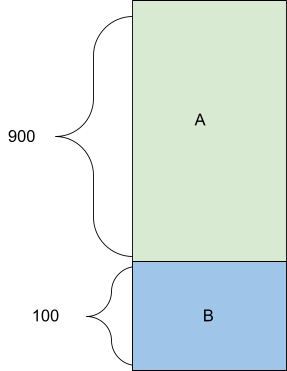

Existem algumas técnicas que podemos aplicar para resolver ou minimizar o efeito de dados desbalanceados, podemos retirar os dados da classe que tem mais, resolvendo assim o problema de desbalanceamento, essa técnica é conhecida como undersampling. Podemos também gerar mais dados da classe que tem menor ocorrência, essa técnica é o oversampling.

Para utilizar o undersampling podemos simplesmente selecionar e remover de maneira aleatória parte da nossa amostra que é mais representada. Existem maneiras mais elaboradas para aplicar essa técnica como, por exemplo, o Cluster. Um problema em aplicar essa técnica é que vamos perder muitos dados, então só conseguimos aplicar ela quando temos muitos dados e mesmo assim vamos estar perdendo informação, algo que pode ser negativo.

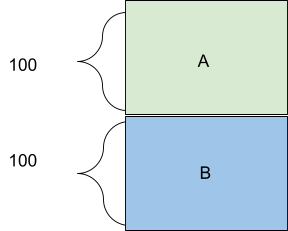

Para utilizar o Oversampling podemos simplesmente duplicar alguma das nossas amostras de maneira aleatória, assim como no undersampling também temos maneiras mais elaboradas de gerar esses dados como, por exemplo, gerar dados sintéticos, é o caso da técnica SMOTE (Synthetic Minority Oversampling Technique).

O SMOTE primeiro seleciona um dado da classe minoritária (A) de forma aleatória e encontra seus k vizinhos mais próximos (utilizando o algoritmo k-nearest neighbor) da mesma classe. Aleatoriamente, um dos k vizinhos mais próximos é selecionado (B) e conectado ao dado A para formar um segmento de reta no espaço das features. Os dados sintéticos são então gerados entre os dados A e B. Essa técnica busca garantir que vamos gerar dados que sejam coerentes com os dados reais. Um ponto muito importante quando estamos aplicando oversampling é que os dados gerados não podem ser utilizados nas etapas de validação dos dados, eles apenas serviram ao propósito de treinar o nosso modelo.

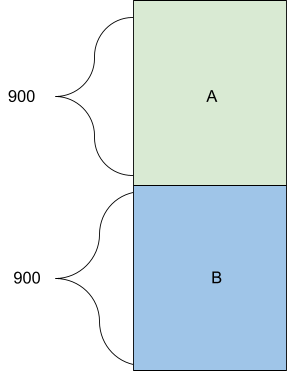

Para quem quiser se aprofundar ainda mais no algoritmo do SMOTE pode consultar o artigo que propôs o SMOTE e entender a matemática e lógica por trás dele.

## Desafios Aula 4 

Desafio 1 - Explorar Undersampling

Desafio 2 - Testar outros modelos (XGBoost por exemplo) e tunar

Desafio 3 - Utilizar otimização de hiperparametros e seleção de features

Desafio 4 - Usar autoML e ver qual modelo sai como melhor

### Desafio 1 - Explorar Undersampling
---

Artigo interessante explicando várias classes de Undersampling disponíveis no imbalance-learn:

https://machinelearningmastery.com/undersampling-algorithms-for-imbalanced-classification/

Várias técnicas de UnderSampling foram exploradas, divididas, principalmente em Keep (seleciona registros a manter), Delete (seleciona registros a deletar) e combinadas (combina métodos anteriores de manter e deletar registros).

Métodos que selecionam os dados a manter (Keep):
- NearMiss: tem 3 tipos
- **Condensed Nearest Neighbor (CNN)** Rule: É mais lenta, recomendada para menores Datasets e menor parametro k. Apresentou melhor resultado que a anterior no artigo;

Métodos que escolhem dados para deleção (Delete):
- Tomek Links: deleta poucos, deve ser usada só se combinada com outros métodos
- Edited Nearest Neighbors: também deleta poucos, mesma recomendação anterior. Melhor uso combinado

Métodos que combinam seleção para manter e para deletar:

- **One-Sided Selection(OSS)**: Teve bom resultado no artigo. Combina Tomek-Links e CNN na sequência.
> OSS is an undersampling method resulting from the application of Tomek links followed by the application of US-CNN. Tomek links are used as an undersampling method and removes noisy and borderline majority class examples. […] US-CNN aims to remove examples from the majority class that are distant from the decision border.

- Neighborhood Cleaning Rule(NCR): Combina ENN (deleção) e CNN (Manter). Remove poucos elementos no artigo, pois tem maior foco em limpeza de dados do que remover redundâncias.

**Os que se mostraram mais interessantes e merecem um teste aqui são o CNN Condensed Nearest Neighbors e o OSS One-Sided Selection.**

### UnderSampling com CNN e OSS ...retomar, demoraram muito no treino


In [103]:
from imblearn.under_sampling import CondensedNearestNeighbour
from imblearn.under_sampling import OneSidedSelection

In [104]:
# pipeline = Pipeline([('Transformador', Transformador(colunas_quantitativas, colunas_categoricas)),
#                      ('sampling', CondensedNearestNeighbour(n_neighbors=1,random_state=SEED)),
#                      ('Modelo', RandomForestClassifier(random_state=SEED))])   
# roda_modelo(pipeline, df_registro_clientes_targets)

In [105]:
# pipeline = Pipeline([('Transformador', Transformador(colunas_quantitativas, colunas_categoricas)),
#                      ('sampling', OneSidedSelection(n_neighbors=1, random_state=SEED)),
#                      ('Modelo', RandomForestClassifier(random_state=SEED))])   
# roda_modelo(pipeline, df_registro_clientes_targets)

### Desafio 2 - Testar outros modelos (XGBoost por exemplo) e tunar

### Desafio 3 - Utilizar otimização de hiperparametros e seleção de features

### Desafio 4 - Usar autoML e ver qual modelo sai como melhor

In [106]:
!pip install auto-sklearn --progress-bar off












  Created wheel for auto-sklearn: filename=auto_sklearn-0.14.3-py3-none-any.whl size=6586730 sha256=73e61244afba949156ce99ebdfd02ccc3d47428b390d949ef427ffc456ff9b6f
  Stored in directory: /root/.cache/pip/wheels/28/df/95/a197368c9745885b878f69ae3d6aec0941ccc28e5e1ce585d4
  Created wheel for pynisher: filename=pynisher-0.6.4-py3-none-any.whl size=7043 sha256=e74ebfb73a8fee3963c4ed1991184899142ff7f64e747edc045ca5b09395b1dd
  Stored in directory: /root/.cache/pip/wheels/42/71/95/7555ec3253e1ba8add72ae5febf1b015d297f3b73ba296d6f6
  Created wheel for liac-arff: filename=liac_arff-2.5.0-py3-none-any.whl size=11732 sha256=6c8ce0dd6950702a51fd035ca8404ab5981310fb61fe9102156d7151c2d28f3f
  Stored in directory: /root/.cache/pip/wheels/1f/0f/15/332ca86cbebf25ddf98518caaf887945fbe1712b97a0f2493b
Successfully built auto-sklearn pynisher liac-arff
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML

In [108]:
!pip install scipy==1.7.1

     |████████████████████████████████| 28.5 MB 1.7 MB/s 
  Attempting uninstall: scipy
    Found existing installation: scipy 1.7.3
    Uninstalling scipy-1.7.3:
      Successfully uninstalled scipy-1.7.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gym 0.17.3 requires cloudpickle<1.7.0,>=1.2.0, but you have cloudpickle 2.0.0 which is incompatible.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [107]:
import autosklearn.classification

IncorrectPackageVersionError: ignored